In [ ]:
from google.colab import drive
drive.mount('/content/drive')

1. Set of necessary libraries


In [ ]:
# import necessary libralies
import numpy as np
import pandas as pd
import scipy.io
from scipy.io import loadmat
import matplotlib.pyplot as plt

## 2. Importing data (Steady State Evoked Visually Potential) SSVEP using Scipy library.


In [ ]:
# Set Path
folder_path = '/content/drive/My Drive/SSVEP_CU_workshop/'

In [ ]:
# import SSVEP datasets
subject = 20
mat_sess1 = scipy.io.loadmat(folder_path + "Datasets/sess01_subj"+str(subject).zfill(2)+"_EEG_SSVEP.mat") # ข้อมูลวันที่ 1 
mat_sess2 = scipy.io.loadmat(folder_path + "Datasets/sess02_subj"+str(subject).zfill(2)+"_EEG_SSVEP.mat") # ข้อมูลวันที่ 2 

In [ ]:
# Check informations inside the matfile
mat_sess1

{'EEG_SSVEP_test': array([[(array([[[  65.59999847,   -7.30000019,   32.20000076, ...,
            64.69999695,  -20.79999924,  -13.30000019],
         [ -36.5       ,  -96.09999847,   12.39999962, ...,
            -1.29999995,   -7.19999981,   -2.0999999 ],
         [ -21.79999924,  -83.30000305,   20.        , ...,
             2.4000001 ,   25.20000076,   56.40000153],
         ...,
         [  23.29999924,  -79.09999847,   34.29999924, ...,
            32.29999924,   -7.        ,  -32.79999924],
         [  41.70000076,  -10.19999981,   24.60000038, ...,
            26.70000076,    1.29999995,   -1.10000002],
         [   5.19999981,  -17.60000038,   31.20000076, ...,
            18.29999924,   -3.4000001 ,   30.39999962]],
 
        [[  61.29999924,   -5.69999981,   19.5       , ...,
            66.        ,  -13.69999981,   -2.9000001 ],
         [ -38.        ,  -97.69999695,   12.30000019, ...,
            -4.69999981,  -13.5       ,   -6.19999981],
         [ -20.60000038,  -7

## 3. Accessing interested SSVEP information


### Overview of the SSVEP dataset
- Participants will be assigned a target stimulus (stimulus turns yellow) for 4 seconds/trial.
Subjects must focus on the target stimulus for 4/trial seconds (the target stimulus flashes at a specific frequency in black and white).
- Each target stimulus was repeated by the participant 25 times.
- So each person has a number of samples (4 frequencies $\times$ 25 times = 100 samples)
- Moreover, each person's SSVEP data will be available in both offline phase (training data, 100 samples) and online phase (testing data, 100 samples).
- Finally, experimental participants will have their SSVEP data collected for 2 days.

Ref: Lee, M.-H., Kwon, O.-Y., Kim, Y.-J., Kim, H.-K., Lee, Y.-E., Williamson, J., … Lee, S.-W. (2019). EEG dataset and OpenBMI toolbox for three BCI paradigms: an investigation into BCI illiteracy. GigaScience, 8(5). [link text](https://doi.org/10.1093/gigascience/giz002)

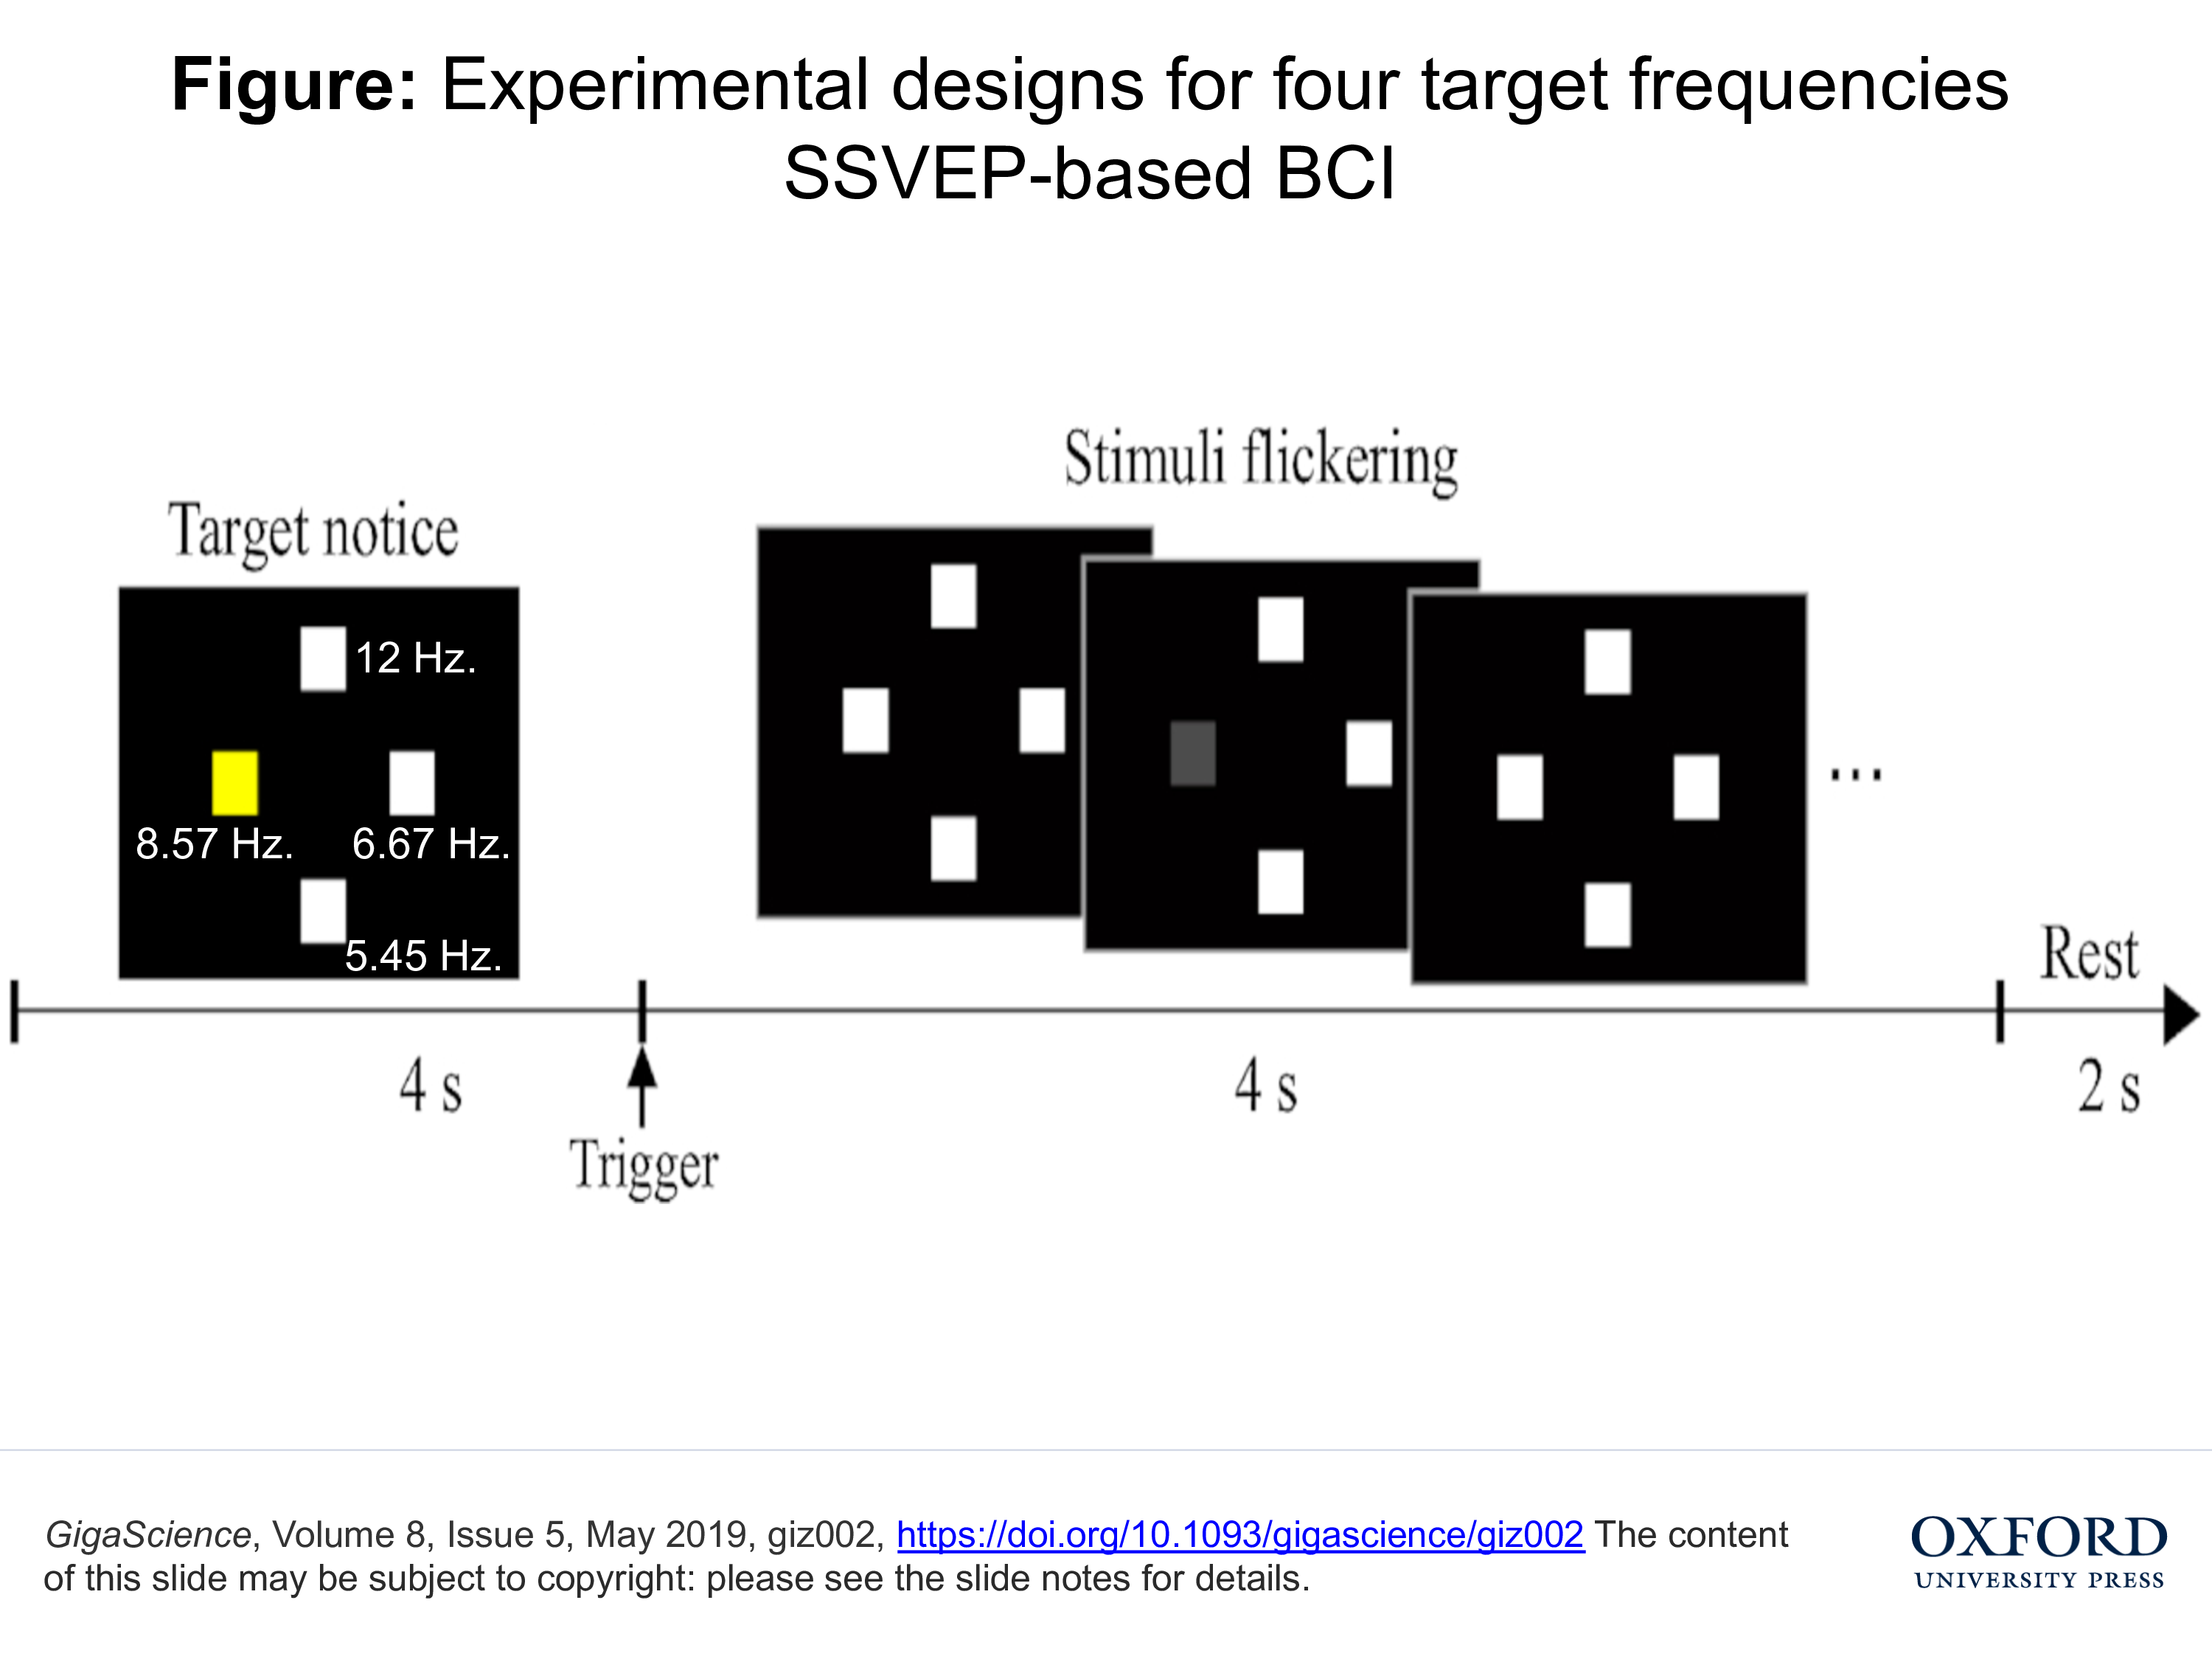

In [ ]:
from IPython.display import Image
Image(folder_path+'All_picture/Four_targets_SSVEP.png', width=700)

### Position of the electrode used to record the SSVEP signal

In [ ]:
Image(folder_path+'All_picture/EEG_electrodes.png', width=700)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Check electrode position from SSVEP data
num_ch = np.array([ch for [ch] in mat_sess1['EEG_SSVEP_train'][0]['chan'][0][0]])
print(num_ch)
print("Note that: The electrode position is the same for both traing data and testing data")

['Fp1' 'Fp2' 'F7' 'F3' 'Fz' 'F4' 'F8' 'FC5' 'FC1' 'FC2' 'FC6' 'T7' 'C3'
 'Cz' 'C4' 'T8' 'TP9' 'CP5' 'CP1' 'CP2' 'CP6' 'TP10' 'P7' 'P3' 'Pz' 'P4'
 'P8' 'PO9' 'O1' 'Oz' 'O2' 'PO10' 'FC3' 'FC4' 'C5' 'C1' 'C2' 'C6' 'CP3'
 'CPz' 'CP4' 'P1' 'P2' 'POz' 'FT9' 'FTT9h' 'TTP7h' 'TP7' 'TPP9h' 'FT10'
 'FTT10h' 'TPP8h' 'TP8' 'TPP10h' 'F9' 'F10' 'AF7' 'AF3' 'AF4' 'AF8' 'PO3'
 'PO4']
Note that: ตำแหน่ง electrode มีเหมือนกัน ทั้ง traing data และ testing data


### Electrode location selected for SSVEP signal analysis.



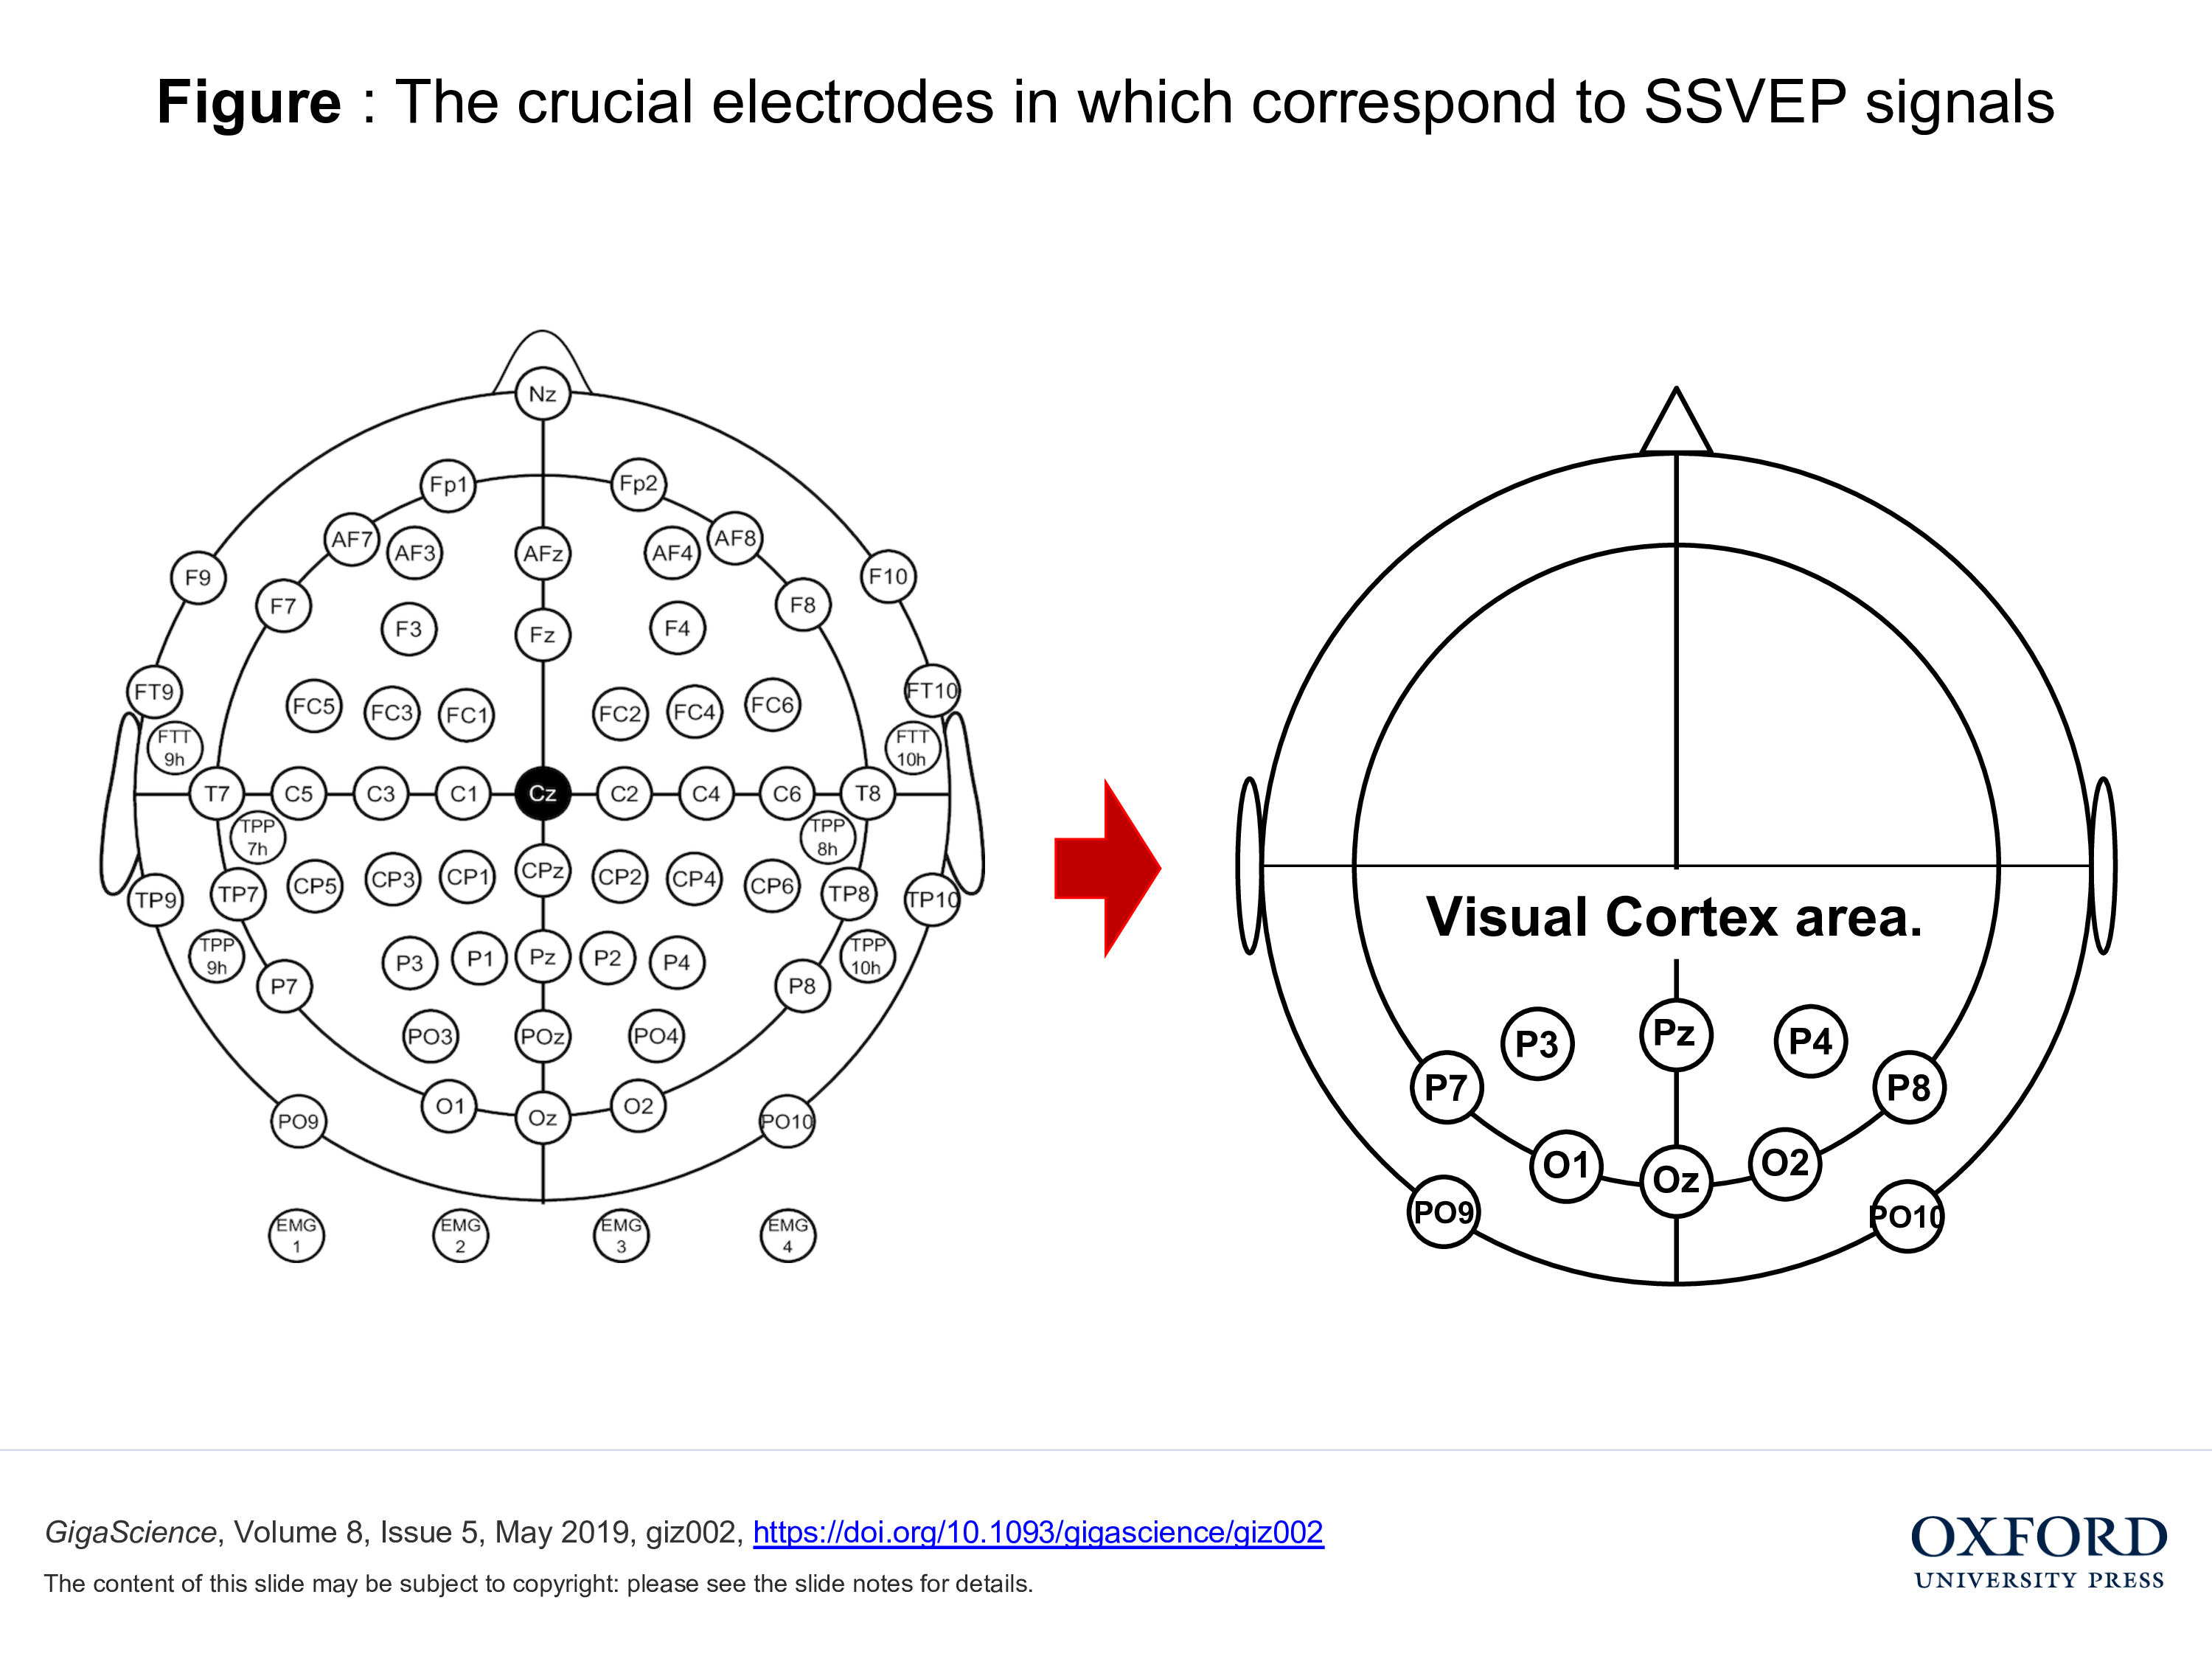

In [ ]:
Image(folder_path+'All_picture/Visual_cortex.png', width=700)

In [ ]:
# Check the index of the electrode from SSVEP data.
ssvep_ch = np.array(['P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'PO10', 'O1', 'Oz', 'O2' ])
idx_ssvep_ch = []

for se_ch in ssvep_ch:
    index_ch = np.where(num_ch == se_ch)[0][0]
    idx_ssvep_ch.append(index_ch)
    print("SSVEP_channel_name:", se_ch ,"---", "Index_is:", index_ch)
print("Done")

SSVEP_channel_name: P7 --- Index_is: 22
SSVEP_channel_name: P3 --- Index_is: 23
SSVEP_channel_name: Pz --- Index_is: 24
SSVEP_channel_name: P4 --- Index_is: 25
SSVEP_channel_name: P8 --- Index_is: 26
SSVEP_channel_name: PO9 --- Index_is: 27
SSVEP_channel_name: PO10 --- Index_is: 31
SSVEP_channel_name: O1 --- Index_is: 28
SSVEP_channel_name: Oz --- Index_is: 29
SSVEP_channel_name: O2 --- Index_is: 30
Done


### 4. Pre-processing SSVEP signal


### Check the sampling rate or sampling frequency of SSVEP data.

In [ ]:
smp_freq = mat_sess1['EEG_SSVEP_train'][0]['fs'][0][0][0]
print("Sampling frequency of this SSVEP dataset is:", smp_freq, "Hz.")

Sampling frequency of this SSVEP dataset is: 1000 Hz.


### Preparation of training data and testing data

In [ ]:
# Prepare SSVEP data (training set and testing set) by considering only the electrode position of interest.
# and organize the dimesion of the data into the format (samples, channels, time_points)

# Training data preparation session 1
tr_sess1 = mat_sess1['EEG_SSVEP_train'][0]['smt'][0] 
print("Dimension_of_raw_training_data", tr_sess1.shape)

tr_sess1 = (np.swapaxes(tr_sess1, 0, 2))[idx_ssvep_ch]# Switch dimensions of training data and select SSVEP electrodes
tr_sess1 = np.swapaxes(tr_sess1, 0, 1) # Perform the final switching of training data dimensions
print("Dimension_of_training_session1:", tr_sess1.shape)

# Training data preparation session 2
tr_sess2 = mat_sess2['EEG_SSVEP_train'][0]['smt'][0] 
print("Dimension_of_raw_training_data", tr_sess2.shape)

tr_sess2 = (np.swapaxes(tr_sess2, 0, 2))[idx_ssvep_ch]# Switch dimensions of training data and select SSVEP electrodes
tr_sess2 = np.swapaxes(tr_sess2, 0, 1) # Perform the final training data dimension swap.
print("Dimension_of_training_session2:", tr_sess2.shape)

Dimension_of_raw_training_data (4000, 100, 62)
Dimension_of_training_session1: (100, 10, 4000)
Dimension_of_raw_training_data (4000, 100, 62)
Dimension_of_training_session2: (100, 10, 4000)


In [ ]:
# Training data preparation session 1
te_sess1 = mat_sess1['EEG_SSVEP_test'][0]['smt'][0] 
print("Dimension_of_raw_testing_data", te_sess1.shape)

te_sess1 = (np.swapaxes(te_sess1, 0, 2))[idx_ssvep_ch]# Switch dimensions of testing data and select SSVEP electrodes
te_sess1 = np.swapaxes(te_sess1, 0, 1) # Perform a final dimension swap of testing data.
print("Dimension_of_testing_session1:", te_sess1.shape)

# Training data preparation session 2
te_sess2 = mat_sess2['EEG_SSVEP_test'][0]['smt'][0]
print("Dimension_of_raw_testing_data", te_sess2.shape)

te_sess2 = (np.swapaxes(te_sess2, 0, 2))[idx_ssvep_ch]# Swap testing data dimensions and select SSVEP electrodes.
te_sess2 = np.swapaxes(te_sess2, 0, 1) # Perform a final dimension swap of testing data.
print("Dimension_of_testing_session2:", te_sess2.shape)

Dimension_of_raw_testing_data (4000, 100, 62)
Dimension_of_testing_session1: (100, 10, 4000)
Dimension_of_raw_testing_data (4000, 100, 62)
Dimension_of_testing_session2: (100, 10, 4000)


### Preparing labels for training data and testing data

In [ ]:
name_class = mat_sess1['EEG_SSVEP_train'][0]['class'][0]
print("Defination of class name is...")
print(name_class)

Defination of class name is...
[[array(['1'], dtype='<U1') array(['up'], dtype='<U2')]
 [array(['2'], dtype='<U1') array(['left'], dtype='<U4')]
 [array(['3'], dtype='<U1') array(['right'], dtype='<U5')]
 [array(['4'], dtype='<U1') array(['down'], dtype='<U4')]]


In [ ]:
#  (label)
print(mat_sess1['EEG_SSVEP_train'][0]['y_dec'][0][0])

[3 2 3 4 3 4 3 3 2 1 3 3 3 1 1 4 2 1 2 3 2 4 2 4 1 1 3 2 2 2 1 1 4 3 4 3 4
 4 3 3 2 2 1 2 1 4 3 1 3 1 3 1 2 1 4 3 3 4 1 1 2 4 1 2 4 1 3 3 3 2 4 2 4 4
 1 3 2 2 1 4 4 2 2 1 4 3 4 4 2 2 4 2 1 1 4 2 1 1 4 3]


In [ ]:
# Label preparation
#Traing set
label_tr_sess1 = mat_sess1['EEG_SSVEP_train'][0]['y_dec'][0][0]
label_tr_sess2 = mat_sess2['EEG_SSVEP_train'][0]['y_dec'][0][0]
#Testing set
label_te_sess1 = mat_sess1['EEG_SSVEP_test'][0]['y_dec'][0][0]
label_te_sess2 = mat_sess2['EEG_SSVEP_test'][0]['y_dec'][0][0]
print("Example of labeling for training an dtesting")
print("Training_label_sess1", label_tr_sess1)
print("Testing_label_sess1", label_te_sess1)

Example of labeling for training an dtesting
Training_label_sess1 [3 2 3 4 3 4 3 3 2 1 3 3 3 1 1 4 2 1 2 3 2 4 2 4 1 1 3 2 2 2 1 1 4 3 4 3 4
 4 3 3 2 2 1 2 1 4 3 1 3 1 3 1 2 1 4 3 3 4 1 1 2 4 1 2 4 1 3 3 3 2 4 2 4 4
 1 3 2 2 1 4 4 2 2 1 4 3 4 4 2 2 4 2 1 1 4 2 1 1 4 3]
Testing_label_sess1 [3 4 4 2 2 4 3 3 2 3 3 4 4 4 1 3 2 2 1 1 4 2 2 4 2 2 3 1 3 2 2 4 2 4 1 1 2
 4 1 1 3 2 4 2 2 4 3 1 4 3 4 2 1 3 3 3 1 4 1 1 1 1 4 1 4 3 1 3 1 4 2 3 2 3
 2 3 4 3 1 1 4 2 3 3 1 2 4 2 1 3 4 3 3 1 1 2 4 1 2 4]


In [ ]:
# Combine SSVEP signal data for both days.
X_train = np.concatenate((tr_sess1, tr_sess2), axis=0)
y_train = np.concatenate((label_tr_sess1, label_tr_sess2), axis=0)

X_test = np.concatenate((te_sess1, te_sess2), axis=0)
y_test = np.concatenate((label_te_sess1, label_te_sess2), axis=0)

print("Checking dimension of both training and testing sets")
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Checking dimension of both training and testing sets
Training shape: (200, 10, 4000)
Testing shape: (200, 10, 4000)


### Down-sampling the SSVEP signal from 1000 Hz to 250 Hz.
- Because the length of the SSVEP signal is 4 seconds per sample Therefore, before down-sampling, the SSVEP signal will have a frequency of 1,000 Hz. (4 seconds total, there will be 4,000 points per time series graph) and after down-sampling, the SSVEP signal should have 1,000 points per time series graph in order to have the frequency of the graph. time series equal to 250 Hz.

In [ ]:
# the necessary library
from scipy import signal

In [ ]:
# Down-sampled function
def resampling(data, new_smp_point):
    if len(data.shape) == 3:
        data_resampled = np.zeros((data.shape[0], data.shape[1], new_smp_point))
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                data_resampled[i,j,:] = signal.resample(data[i,j,:], new_smp_point)
        print("Down sampling is finished with dimension of: ", data_resampled.shape)
        return data_resampled
    else:
        print("---Error dimension---")

In [ ]:
# Perform down-sampling on the tranning set and testing set.
new_sample_point = 1000
new_smp_freq = 250
X_train_ds = resampling(X_train, new_sample_point) 
X_test_ds = resampling(X_test, new_sample_point) 

print("Validate the dimension in both of training and testing sets")
print("New shape of training set:", X_train_ds.shape)
print("New shape of testing set:", X_test_ds.shape)

Down sampling is finished with dimension of:  (200, 10, 1000)
Down sampling is finished with dimension of:  (200, 10, 1000)
Validate the dimension in both of training and testing sets
New shape of training set: (200, 10, 1000)
New shape of testing set: (200, 10, 1000)


### Screening of frequencies of interest in SSVEP signals.
- Because the SSVEP signal received directly from the brain signal meter has the frequency of a signal that is not of interest mixed in (Noise), especially at 50 Hz., which is the frequency of general household electricity. If not filtered out, the signal at this frequency will obscure the frequency of the SSVEP signal.
- In this workshop, we will use the Band-pass filter technique to filter out only the frequency range of interest by setting low_cut = 4.5 Hz., high_cut = 40 Hz. and order = 2.

In [ ]:
# Necessary library
from scipy.signal import butter, filtfilt

In [ ]:
# Band-pass filter is one of pre-processing technique.
def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

In [ ]:
# Perform frequency filtering on the SSVEP signal to keep the frequency in the range 4.5-40 Hz.
X_train_bf = butter_bandpass_filter(X_train_ds, 4.5, 40, new_smp_freq, 2) 
X_test_bf = butter_bandpass_filter(X_test_ds, 4.5, 40, new_smp_freq, 2) 
print("Check the dimension in both of training and testing sets")
print("Shape of training set:", X_train_bf.shape)
print("Shape of testing set:", X_test_bf.shape)

Check the dimension in both of training and testing sets
Shape of training set: (200, 10, 1000)
Shape of testing set: (200, 10, 1000)



### Visualizing the graph of the SSVEP signal before - after using the band-pass filter.

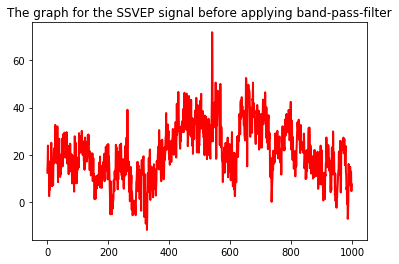

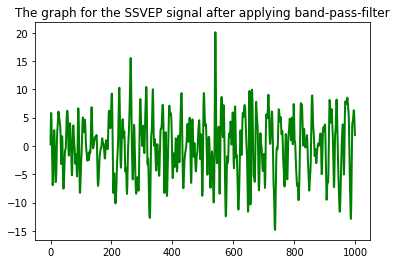

In [ ]:
plt.plot(X_train_ds[0,8,:], 'r', linewidth = 2)
plt.title("The graph for the SSVEP signal before applying band-pass-filter")
plt.show()

plt.plot(X_train_bf[0,8,:], 'g', linewidth = 2)
plt.title("The graph for the SSVEP signal after applying band-pass-filter")
plt.show()

### 5. Analysis of frequency of SSVEP signal (SSVEP frequency recognition)


**Canonical correlation analysis (CCA) is considered an effective unsupervised learning method. and fast for frequency detection Therefore, it is used to analyze the frequency of steady-state visual evoked potentials (SSVEP) brain signals for collecting brain signals in a form. electroencephalogram (EEG)**


***The working of the CCA technique considers 2 sets of functions***
1. $\boldsymbol{X}$ is the set of multi-channel SSVEP signals obtained from the measurement.
2. $\boldsymbol{Y}$ is the set of signals generated using the frequency of the stimulus. For example, a square-wave periodic signal is generated using the same frequency as the visual stimulus. The frequency of the visual stimulus is also is converted to Fourier series to produce signals with other harmonics ($\sin(2 \pi fn)$, $\cos(2 \pi fn)$, $\sin(4 \pi fn)$,.. .)
\begin{equation*}
    \small
    \boldsymbol{Y}_f(n)=
    \begin{bmatrix}
    \sin(2\pi
    fn)\\
    \cos(2\pi
    fn)\\
    \vdots\\
    \sin(2\pi
    N_hfn)\\
    \cos(2\pi
    N_hfn)\\
    \end{bmatrix}, \quad
    n = \frac{1}{f_s},\frac{2}{f_s},\dotsc,\frac{N_s}{f_s}
\end{equation*}
where $f$ is the frequency of visual stimulation, $N_h$ is the harmonic number, $f_s$ is the sampling frequency.
3. Consider linear combinations. $\boldsymbol{x} = \boldsymbol{X}^T \boldsymbol{W_X}$ and $\boldsymbol{y} = \boldsymbol{Y}^T \boldsymbol{W_Y}$ , where $\boldsymbol{X}$ and $\boldsymbol{Y}$ is a multivariate function.

4. Here, CCA determines the weight vector $\boldsymbol{W_X}, \boldsymbol{W_Y}$ and the largest canonical relationship between $\boldsymbol{x}$ and $\boldsymbol{y}$ can be found from:
\begin{equation}
\small
\underset{\boldsymbol{W_X},\boldsymbol{W_Y}}{\max}
{\rho(\boldsymbol{x}, \boldsymbol{y})} = 
\frac
{E \left[ \boldsymbol{W}^T_{\boldsymbol{X}} \boldsymbol{X} \boldsymbol{Y}^T \boldsymbol{W_Y} \right]}
{\sqrt{E \left[ \boldsymbol{W_X}^T\boldsymbol{XX}^T\boldsymbol{W_X}\right]\left[ \boldsymbol{W_Y}^T\boldsymbol{YY}^T\boldsymbol{W_Y}\right] }}
\end{equation} where maximum $\rho$ is proportional to $\boldsymbol{W_X}$ and $\boldsymbol{W_Y}$, which gives the result with the highest canonical relationship.
5. The final step is voting. Suppose we have K stimulus frequencies $f_1, f_2, ..., f_K$. Then we choose the appropriate frequency ($f_m$) by considering the equation:
\begin{equation}
\small
\boldsymbol{f_m} = \underset{\boldsymbol{f}}{\max}
{\rho({f})}, \quad {f_1, f_2, ..., f_K}
\end{equation}

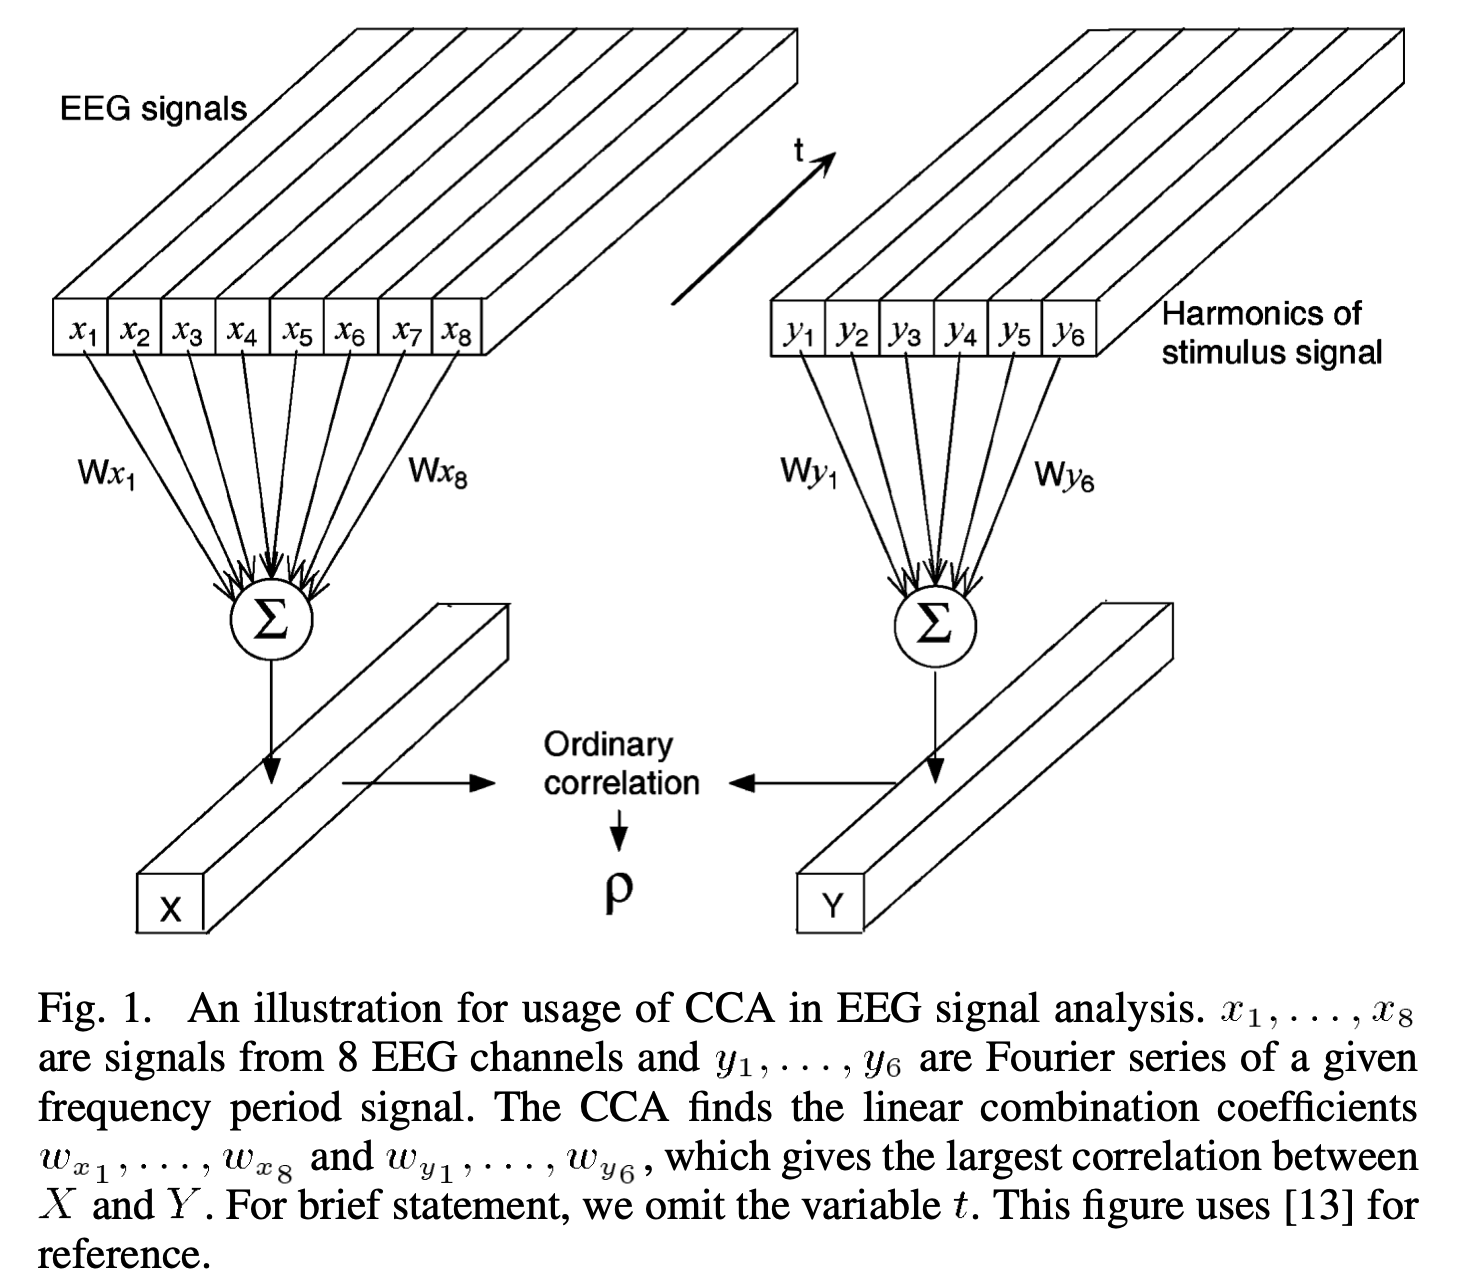

In [ ]:
Image(folder_path+'All_picture/cca_picture.png', width=700)

In [ ]:
# Switch dimensions of training and testing data
X_train_sw = np.swapaxes(X_train_ds,1,2)
X_test_sw = np.swapaxes(X_test_ds,1,2)
print(X_train_sw.shape)

(200, 1000, 10)


In [ ]:
# Change the label values ​​in Figure 1-4 to frequency format. 
def convert_class_to_freq(data):
    new_label = []
    for val_class in data:
        if val_class == 1:
            new_label.append(12)
        elif val_class == 2:
            new_label.append(8.57)
        elif val_class == 3:
            new_label.append(6.67)
        else:
            new_label.append(5.45)
    return np.array(new_label)

# main code for converting classes
y_train_cf = convert_class_to_freq(y_train)
y_test_cf = convert_class_to_freq(y_test)

In [ ]:
# CCA constant
PI = np.pi
sampling_frequency = 250
candidate_frequency = [5.45, 6.67, 8.57, 12]
reference_signal_phase = 0

In [ ]:
# Generate Reference Frequency
sin = lambda f, h, t, p: np.sin(2*PI*f*h*t + p)
cos = lambda f, h, t, p: np.cos(2*PI*f*h*t + p)
ref_wave = lambda f, h, t, p: [sin(f, h, t, p), cos(f, h, t, p)]

def generate_reference_signal_at_time(f, t, max_harmonic, phase):
    values = []
    for h in range(1, max_harmonic + 1):
        values += ref_wave(f, h, t, phase)
    return values

def generate_reference_signal(frequency, sampling_frequency, total_time, max_harmonic, phase):
    ref_signal = []
    num_time_step = total_time * sampling_frequency
    for step in range(num_time_step):
        time = step * 1/sampling_frequency
        ref_signal_at_t = generate_reference_signal_at_time(frequency, time, max_harmonic, phase)
        ref_signal.append(ref_signal_at_t)
    return ref_signal

In [ ]:
# Solve for Maximum CCA from two multidimensional signal
def find_maximum_canonical_correlations(X, Y):
    if X.shape[0] == Y.shape[0]:
        N = X.shape[0]
    else:
        print('time frame is not equal')
        return None
    C_xx = 1/N * (X.T @ X)
    C_yy = 1/N * (Y.T @ Y)
    C_xy = 1/N * (X.T @ Y)
    C_yx = 1/N * (Y.T @ X)
    C_xx_inv = np.linalg.pinv(C_xx)
    C_yy_inv = np.linalg.pinv(C_yy)
    eig_values, eig_vectors = scipy.linalg.eig(C_yy_inv @ C_yx @ C_xx_inv @ C_xy)
    sqrt_eig_values = np.sqrt(eig_values)
    return max(sqrt_eig_values)

In [ ]:
# Generate Reference Data
ref_signal = {}
for frequency in candidate_frequency:
    signal = generate_reference_signal(
            frequency=frequency,
            sampling_frequency=250,
            total_time=4,
            max_harmonic=6,
            phase=reference_signal_phase
    )
    ref_signal[frequency] = pd.DataFrame(signal)

In [ ]:
def classify_cca(input_data, ref_signal, actual_freq):
    input_signal = pd.DataFrame(input_data)
    max_cca = {}
    for ref_signal_key in ref_signal.keys():
        value = find_maximum_canonical_correlations(input_signal, ref_signal[ref_signal_key])
        if value.imag == 0.0:
            value = value.real
        else:
            value = None
        max_cca[ref_signal_key] = value
    max_cca["result"] = max(max_cca.items(), key = lambda x: x[1])[0]
    max_cca["actual_freq"] = actual_freq
    return max_cca

In [ ]:
result = {}
result['training'] = []
result['testing'] = []
for window_index in range(X_train_bf.shape[0]):
    result['training'].append(
        classify_cca(X_train_sw[window_index,:,:], ref_signal, y_train_cf[window_index])
    )
    result['testing'].append(
        classify_cca(X_test_sw[window_index,:,:], ref_signal, y_test_cf[window_index])
    )
training_result = pd.DataFrame(result['training'])
testing_result = pd.DataFrame(result['testing'])

In [ ]:
print("Result from training data of subject", subject)
sum_correct = np.sum(training_result['result'] == training_result["actual_freq"])
acc_tr = sum_correct / len(training_result['result'].values)
print("Correct frequencies: {} from total: {}".format(sum_correct, len(training_result['result'])))
print("The accuracy is:", acc_tr)
training_result

Result from training data of subject 20
Correct frequencies: 187 from total: 200
The accuracy is: 0.935


,5.45,6.67,8.57,12,result,actual_freq
0,0.214664,0.432972,0.158999,0.179405,6.67,6.67
1,0.246311,0.152926,0.541394,0.150433,8.57,8.57
2,0.198431,0.373378,0.165581,0.148657,6.67,6.67
3,0.514109,0.162637,0.232795,0.188886,5.45,5.45
4,0.206485,0.327963,0.183383,0.161092,6.67,6.67
...,...,...,...,...,...,...
195,0.229811,0.170173,0.529109,0.172082,8.57,8.57
196,0.306838,0.372637,0.163210,0.143881,6.67,6.67
197,0.227406,0.208072,0.315800,0.587240,12.00,12.00
198,0.165727,0.206428,0.411275,0.169219,8.57,8.57


In [ ]:
print("Result from testing data of subject", subject)
sum_correct = np.sum(testing_result['result'] == testing_result["actual_freq"])
acc_tr = sum_correct / len(testing_result['result'].values)
print("Correct frequencies: {} from total: {}".format(sum_correct, len(testing_result['result'])))
print("The accuracy is:", acc_tr)
testing_result

Result from testing data of subject 20
Correct frequencies: 192 from total: 200
The accuracy is: 0.96


,5.45,6.67,8.57,12,result,actual_freq
0,0.173016,0.382016,0.161521,0.180884,6.67,6.67
1,0.460412,0.155704,0.161467,0.190703,5.45,5.45
2,0.455549,0.185752,0.187256,0.144046,5.45,5.45
3,0.235939,0.189083,0.398689,0.138651,8.57,8.57
4,0.246468,0.140635,0.354269,0.193694,8.57,8.57
...,...,...,...,...,...,...
195,0.159854,0.199910,0.774501,0.224365,8.57,8.57
196,0.456921,0.137139,0.191046,0.132485,5.45,5.45
197,0.143072,0.165409,0.293523,0.748104,12.00,12.00
198,0.261176,0.195210,0.476455,0.153574,8.57,8.57


### Visualizing the frequency domain (Power Spectral Density based Analysis: PSDA, classical method) of the SSVEP signal to confirm the results obtained from CCA.

The_frequency_which_is_the_highest_power:  13.25


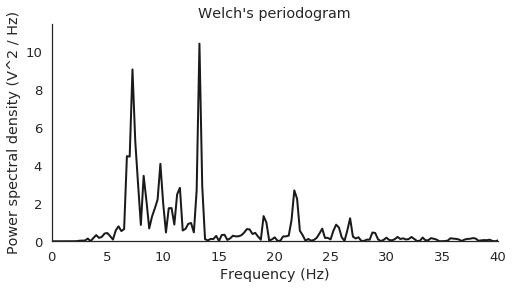

In [ ]:
import seaborn as sns
from scipy import signal
sns.set(font_scale=1.2)
# Define window length (4 seconds)
win = 4 * 250
freqs, psd = signal.welch(X_train_bf[2,8,:], 250, nperseg=win)
print("The_frequency_which_is_the_highest_power: ", freqs[np.argmax(psd)])
# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, 40])
sns.despine()

## 6. Disadvantages of frequency recognition algorithm (CCA)

- In terms of using SSVEP signals and frequency detection with CCA to control robot systems, Each command cycle typically only analyzes SSVEP signals approximately 1 second long. to bring the system closer to the online format
- Therefore, using the CCA technique to detect the SSVEP signal frequency, length 1 second per command cycle. As a result, the efficiency of CCA is reduced due to the relatively short length of the signal being analyzed.

### Understanding how to make SSVEP signal slides


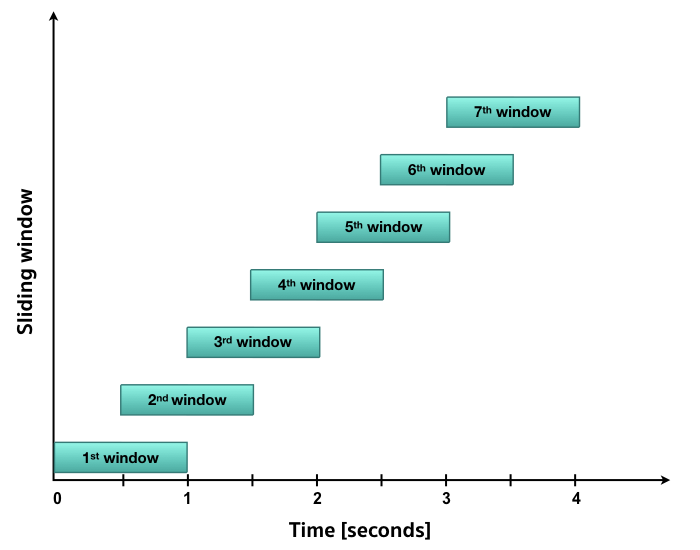

In [ ]:
Image(folder_path+'All_picture/sliding_window.png', width=700)

### Note
- Because the SSVEP slider increases the number of samples from the original 1 sample, we considered the length of the SSVEP signal to be 4 seconds (1,000 time points), but after SSVEP slider the number increased to 7 samples and the size of SSVEP signal 1 second (250 time points)
- Since the number of samples increases from 1 sample to 7 samples and every additional sample still belongs to the same class, we must create a new label that must be 7 times the size of the original.

In [ ]:
# Create a function to slide the SSVEP signal to 1 second per sample.

def sliding_window(data, win_sec_len, smp_freq):
    len_data = data.shape[1]
    step = 0.5 # It means 50 percentages of overlap 
    win_len = int(win_sec_len*smp_freq)
    num_win = int(((len_data - win_len)/(win_len * step))+1) # A number of sliding window
    data_slid = np.zeros((data.shape[0], num_win, win_len, data.shape[2]))

    for sample in range(data.shape[0]):             # number of samples
        for idx_win in range(num_win):              # number of slices
            for channel in range(data.shape[2]):    # number of channels
                start_pos = int(idx_win * win_len * step)
                stop_pos  = int(start_pos + win_len)
                data_slid[sample, idx_win, :, channel] = data[sample, start_pos:stop_pos, channel]
    return data_slid, num_win

In [ ]:
# Slide the SSVEP signal from 4 seconds long (1,000 time points) to 1 second long (250 time points).
X_train_slid, _ = sliding_window(X_train_sw, 1, new_smp_freq)
X_test_slid, num_win = sliding_window(X_test_sw, 1, new_smp_freq)
print("Dimension of training set is: ", X_train_slid.shape)
print("Dimension of testing set is: ", X_test_slid.shape)
print("A number of sliding window is: ", num_win)

Dimension of training set is:  (200, 7, 250, 10)
Dimension of testing set is:  (200, 7, 250, 10)
A number of sliding window is:  7


In [ ]:
# Increase the number of labels
y_train_slid = np.repeat(y_train_cf[:, np.newaxis], num_win, axis=1)
y_test_slid = np.repeat(y_test_cf[:, np.newaxis], num_win, axis=1)
print("Our new labeling for training is: \n", y_train_slid)
print("\n")
print("The dimension of our new labeling for testing is: ", y_test_slid.shape)

Our new labeling for training is: 
 [[ 6.67  6.67  6.67 ...  6.67  6.67  6.67]
 [ 8.57  8.57  8.57 ...  8.57  8.57  8.57]
 [ 6.67  6.67  6.67 ...  6.67  6.67  6.67]
 ...
 [12.   12.   12.   ... 12.   12.   12.  ]
 [ 8.57  8.57  8.57 ...  8.57  8.57  8.57]
 [ 5.45  5.45  5.45 ...  5.45  5.45  5.45]]


The dimension of our new labeling for testing is:  (200, 7)


In [ ]:
# Convert the dimensions of training data and testing data by considering every sliding window as 1 sample.
# Training set
X_train_new = X_train_slid.reshape(-1, X_train_slid.shape[2], X_train_slid.shape[3]) 
y_train_new = y_train_slid.reshape(-1)

# Testing set
X_test_new = X_test_slid.reshape(-1, X_test_slid.shape[2], X_test_slid.shape[3]) 
y_test_new = y_test_slid.reshape(-1)

print("=== Checking dimension of training and testing data ===")
print("\n ...")
print("Dimension of training data: ", X_train_new.shape)
print("Dimension of label of training data: ", y_train_new.shape)
print("\n ...")
print("Dimension of testing data: ", X_test_new.shape)
print("Dimension of label of testing data: ", y_test_new.shape)

=== Checking dimension of training and testing data ===

 ...
Dimension of training data:  (1400, 250, 10)
Dimension of label of training data:  (1400,)

 ...
Dimension of testing data:  (1400, 250, 10)
Dimension of label of testing data:  (1400,)



## Use CCA to recheck frequency.

In [ ]:
# Generate Reference Data
ref_signal_part2 = {}
for frequency2 in candidate_frequency:
    signal2 = generate_reference_signal(
            frequency=frequency2,
            sampling_frequency=250,
            total_time=1,
            max_harmonic=6,
            phase=reference_signal_phase
    )
    ref_signal_part2[frequency2] = pd.DataFrame(signal2)

In [ ]:
# Perform CCA to detect the target SSVEP frequency
result_part2 = {}
result_part2['training'] = []
result_part2['testing'] = []
for idx_sample in range(X_train_new.shape[0]):
    result_part2['training'].append(
        classify_cca(X_train_new[idx_sample,:,:], ref_signal_part2, y_train_new[idx_sample])
    )
    result_part2['testing'].append(
        classify_cca(X_test_new[idx_sample,:,:], ref_signal_part2, y_test_new[idx_sample])
    )
training_result = pd.DataFrame(result_part2['training'])
testing_result = pd.DataFrame(result_part2['testing'])

In [ ]:
print("Result from training data after using sliding window size 1 secs with 50% overlap of subject", subject)
sum_correct = np.sum(training_result['result'] == training_result["actual_freq"])
acc_tr = sum_correct / len(training_result['result'].values)
print("Correct frequencies: {} from total: {}".format(sum_correct, len(training_result['result'])))
print("The accuracy is:", acc_tr)
training_result

Result from training data after using sliding window size 1 secs with 50% overlap of subject 20
Correct frequencies: 918 from total: 1400
The accuracy is: 0.6557142857142857


,5.45,6.67,8.57,12,result,actual_freq
0,0.464108,0.545682,0.493576,0.527872,6.67,6.67
1,0.557189,0.635153,0.426675,0.502530,6.67,6.67
2,0.480877,0.599609,0.344703,0.406079,6.67,6.67
3,0.395189,0.538919,0.568582,0.471536,8.57,6.67
4,0.447171,0.560056,0.463797,0.345653,6.67,6.67
...,...,...,...,...,...,...
1395,0.717602,0.586332,0.744681,0.431958,8.57,5.45
1396,0.614937,0.581888,0.624110,0.398694,8.57,5.45
1397,0.539461,0.524003,0.614339,0.328506,8.57,5.45
1398,0.524574,0.507384,0.668827,0.430370,8.57,5.45


In [ ]:
print("Result from testing data after using sliding window size 1 secs with 50% overlap of subject", subject)
sum_correct = np.sum(testing_result['result'] == testing_result["actual_freq"])
acc_tr = sum_correct / len(testing_result['result'].values)
print("Correct frequencies: {} from total: {}".format(sum_correct, len(testing_result['result'])))
print("The accuracy is:", acc_tr)
testing_result

Result from testing data after using sliding window size 1 secs with 50% overlap of subject 20
Correct frequencies: 984 from total: 1400
The accuracy is: 0.7028571428571428


,5.45,6.67,8.57,12,result,actual_freq
0,0.455350,0.476669,0.395812,0.325479,6.67,6.67
1,0.368325,0.419993,0.443156,0.411597,8.57,6.67
2,0.348168,0.499280,0.391511,0.325864,6.67,6.67
3,0.329657,0.435003,0.375103,0.400832,6.67,6.67
4,0.352488,0.481604,0.328028,0.373375,6.67,6.67
...,...,...,...,...,...,...
1395,0.611642,0.400374,0.683788,0.271835,8.57,5.45
1396,0.565137,0.440891,0.692251,0.435756,8.57,5.45
1397,0.714835,0.403942,0.511749,0.355306,5.45,5.45
1398,0.675072,0.438228,0.585126,0.339138,5.45,5.45


In [ ]:
# display(Markdown(f'### Result from training data after using sliding window size 1 secs with 50% overlap'))
# display(Markdown(f'#### Person #{subject}'))
# sum_correct = np.sum(training_result['result'] == training_result["actual_freq"])
# acc_tr = sum_correct / len(training_result['result'].values)
# display(Markdown(f"Correctly classify {sum_correct} / {len(training_result['result'].values)}"))
# display(Markdown(f"Accuracy {acc_tr}"))
# training_result

In [ ]:
# display(Markdown(f'### Result from testing data after using sliding window size 1 secs with 50% overlap'))
# display(Markdown(f'#### Person #{subject}'))
# sum_correct = np.sum(testing_result['result'] == testing_result["actual_freq"])
# acc_tr = sum_correct / len(testing_result['result'].values)
# display(Markdown(f"Correctly classify {sum_correct} / {len(testing_result['result'].values)}"))
# display(Markdown(f"Accuracy {acc_tr}"))
# testing_result

## 6. Using a simple machine learning model to separate the frequencies of SSVEP signals.

### - Need to reduce the size of the number of dimensions of both training and testing data (Dimensionality Reduction) because both data have up to 10 dimensions, making it take a long time for training and there may be a lot of noise mixed in, so Reducing the number of dimensions helps make the features of interest stand out, making the clasifier work more efficiently.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

- Before doing LDA, we need to prepare the data in 2D form first (samples, features). Here we will find the average of one time series line to represent that time series.

In [ ]:
# Dara preparation for performing LDA
X_train_swb = np.swapaxes(X_train_new,1,2)
X_test_swb = np.swapaxes(X_test_new,1,2)
print("The shape of training", X_train_swb.shape)
print("The shape of testing", X_test_swb.shape)

The shape of training (1400, 10, 250)
The shape of testing (1400, 10, 250)


In [ ]:
# Label usage should be in class 0,1,2,3 format.
y_train_final = (np.repeat(y_train[:, np.newaxis], num_win, axis=1).reshape(-1))-1
y_test_final = (np.repeat(y_test[:, np.newaxis], num_win, axis=1).reshape(-1))-1
print(y_train_final)
print(y_test_final.shape)

[2 2 2 ... 3 3 3]
(1400,)


In [ ]:
lda = LDA(n_components=3)
X_train_lda = lda.fit_transform(X_train_swb.reshape(X_train_swb.shape[0], -1), y_train_final)
X_test_lda = lda.transform(X_test_swb.reshape(X_test_swb.shape[0], -1))
print(X_train_lda.shape)
print(X_test_lda.shape)

(1400, 3)
(1400, 3)


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [ ]:
from sklearn.model_selection import train_test_split
X_val_split, X_test_split, y_val_split, y_test_split = train_test_split(X_test_lda, y_test_final, test_size=0.5, 
                                               shuffle = True, random_state=0, stratify = y_test_final)
print("Dimension of validation data is: ", X_val_split.shape)
print("Dimension of validation label is: ", y_val_split.shape)
print("\n")
print("Dimension of testing data is: ", X_test_split.shape)
print("Dimension of testing label is: ", y_test_split.shape)

Dimension of validation data is:  (700, 3)
Dimension of validation label is:  (700,)


Dimension of testing data is:  (700, 3)
Dimension of testing label is:  (700,)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3],
                     'C': [0.10, 0.1, 1, 10, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3],
                     'C': [0.10, 0.1, 1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'gamma' : ['auto'], 'C': [0.10, 0.1, 1, 10, 100, 1000]},
                    {'kernel': ['poly'],  'gamma': [1e-2, 1e-3], 'C': [0.10, 0.1, 1, 10, 100, 1000], 'degree': [0,1,2,3,4,5]}]

# Using Grid serach algorithm to find
kfolds = StratifiedKFold(10)
clf = GridSearchCV(SVC(), tuned_parameters, cv=kfolds.split(X_train_lda, y_train_final), scoring = 'accuracy')
clf.fit(X_train_lda, y_train_final)

# Clasifying with an optimal parameter set
Optimal_params = clf.best_params_
print(Optimal_params)
classifer = SVC(**Optimal_params)
classifer.fit(X_train_lda, y_train_final)
print(classifer.score(X_test_split, y_test_split))

{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.5185714285714286



### Disadvantages of Grid search
- ???

In [ ]:
list_C = [0.001,0.01,0.10, 0.1, 1, 10, 100, 1000]
list_gamma = ['auto', 1e-2, 1e-3, 1e-4]
list_kernel = ['linear', 'sigmoid', 'rbf']

min_acc = 0
for c_val in list_C:
    for gamma_val in list_gamma:
        for kernel in list_kernel:
            model = SVC(kernel=kernel, gamma = gamma_val, C = c_val)
            model.fit(X_train_lda, y_train_final)
            acc = model.score(X_val_split, y_val_split)
            if acc > min_acc:
                min_acc = acc
                best_C = c_val 
                best_gamma = gamma_val
                best_kernel = kernel
                print("The best C value is: {} The best gamma is: {} The best Kernel:{} The best accuracy: {}".format(best_C,best_gamma, best_kernel, acc))

clf = SVC(kernel=best_kernel, gamma = best_gamma,  C= best_C)
clf.fit(X_train_lda, y_train_final)
print(clf.score(X_test_split, y_test_split))

The best C value is: 0.001 The best gamma is: auto The best Kernel:linear The best accuracy: 0.5385714285714286
The best C value is: 0.01 The best gamma is: auto The best Kernel:linear The best accuracy: 0.5414285714285715
The best C value is: 1 The best gamma is: 0.01 The best Kernel:rbf The best accuracy: 0.5457142857142857
0.5242857142857142


# ***--- See ya!!! At LAB 2 ---***